In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
#preparação dos dados

from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

In [3]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [4]:
#PADRONIZAÇÃO

from sklearn import preprocessing
std = preprocessing.StandardScaler()
df_std = std.fit_transform(df)

In [5]:
df_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [6]:
#ESCALAR PARA UM INTERVALO
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
df_mms = mms.fit_transform(df)

In [7]:
df_mms


array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

In [8]:
#VARIÁVEIS DUMMY

df = pd.DataFrame({'Col1': ['a', 'b', 'd'], 'Col2': ['b', 'a', 'c'],
                   'Col3': [1, 2, 3]})

In [9]:
df

Col1 Col2  Col3
0    a    b     1
1    b    a     2
2    d    c     3

In [10]:
pd.get_dummies(df)

Col3  Col1_a  Col1_b  Col1_d  Col2_a  Col2_b  Col2_c
0     1       1       0       0       0       1       0
1     2       0       1       0       1       0       0
2     3       0       0       1       0       0       1

In [11]:
#CODIFICADOR DE RÓTULOS

from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
col1 = lab.fit_transform(df.Col1)

In [12]:
col1

array([0, 1, 2])

In [13]:
#TRATAMENTO DE DADOS FALTANTES
# removendo linhas com  valores faltantes
df.dropna(inplace=True)

In [14]:
# preenchendo os valores faltantes com a media
df.fillna(df.mean())

Col1 Col2  Col3
0    a    b     1
1    b    a     2
2    d    c     3

In [15]:
#LEITURA DOS DADOS

df_choice = pd.read_csv('multipleChoiceResponses.csv',low_memory=False)
df_choice.columns = df_choice.iloc[0]
df_choice = df_choice.drop(0)
df_choice.head(2)

0 Duration (in seconds) What is your gender? - Selected Choice  \
1                   710                                 Female   
2                   434                                   Male   

0 What is your gender? - Prefer to self-describe - Text  \
1                                                 -1      
2                                                 -1      

0 What is your age (# years)? In which country do you currently reside?  \
1                       45-49                  United States of America   
2                       30-34                                 Indonesia   

0 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                    Doctoral degree                                                                
2                                  Bachelor’s degree                                                                

0 Which best describes your undergraduate major? - Selected Choice  \
1                                              Other                 
2                 Engineering (non-computer focused)                 

0 Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                         Consultant                                                        
2                                              Other                                                        

0 Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
1                                                 -1                                                     
2                                                  0                                                     

0 In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
1                                              Other                                                                
2                          Manufacturing/Fabrication                                                                

0 In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text  \
1                                                  0                                                             
2                                                 -1                                                             

0 How many years of experience do you have in your current role?  \
1                                                NaN               
2                                               5-10               

0 What is your current yearly compensation (approximate $USD)?  \
1                                                NaN             
2                                          10-20,000             

0 Does your current employer incorporate machine learning methods into their business?  \
1                                      I do not know                                     
2                      No (we do not use ML methods)                                     

0 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions  \
1  Analyze and understand data to influence produ...                                                                                                                                              
2                                                NaN                                                                                                                                              

0 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows  \
1  Build an

In [16]:
def missing_values_table(df):
        mis_val = df.isnull().sum() # conta a quantidade de missing
        mis_val_percent = 100 * df.isnull().sum() / len(df) # calcula a porcentagem
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # cria uma tabela
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) # renomeia as colunas
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) # ordena os valores
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_df = missing_values_table(df_choice);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 80].index)

Your selected dataframe has 395 columns.
There are 356 columns that have missing values.


In [17]:
df = df_choice.drop(list(missing_columns), axis=1)

In [18]:
# os outros vamos inputar

df = df.fillna('missing')

In [19]:
# vamos agrupar a pergunta de genero 
df.iloc[:,1] = df.iloc[:,1].replace({'Prefer not to say': 'Others', 'Prefer to self-describe': 'Others'})

In [20]:
df.iloc[:, 4].unique()

array(['United States of America', 'Indonesia', 'India', 'Colombia',
       'Chile', 'Turkey', 'Hungary', 'Ireland', 'France', 'Argentina',
       'Japan', 'Nigeria', 'Spain', 'Other',
       'Iran, Islamic Republic of...',
       'United Kingdom of Great Britain and Northern Ireland', 'Poland',
       'Kenya', 'Denmark', 'Netherlands', 'China', 'Sweden', 'Ukraine',
       'Canada', 'Australia', 'Russia', 'Austria', 'Italy', 'Mexico',
       'Germany', 'I do not wish to disclose my location', 'Singapore',
       'Brazil', 'Switzerland', 'South Africa', 'South Korea', 'Malaysia',
       'Hong Kong (S.A.R.)', 'Egypt', 'Tunisia', 'Portugal', 'Thailand',
       'Morocco', 'Pakistan', 'Czech Republic', 'Romania', 'Israel',
       'Philippines', 'Bangladesh', 'Belarus', 'Viet Nam', 'Belgium',
       'New Zealand', 'Norway', 'Finland', 'Greece', 'Peru',
       'Republic of Korea'], dtype=object)

In [21]:
allowed_vals = ['United States of America', 'India', 'China', 'Russia', 'Other', 'Brazil', \
               'Germany', 'United Kingdom of Great Britain and Northern Ireland',\
               'Canada', 'France', 'Japan']

In [22]:
df.loc[~df["In which country do you currently reside?"].isin(allowed_vals), "In which country do you currently reside?"] = "Others2"

In [23]:
df.iloc[:, 4].unique()

array(['United States of America', 'Others2', 'India', 'France', 'Japan',
       'Other', 'United Kingdom of Great Britain and Northern Ireland',
       'China', 'Canada', 'Russia', 'Germany', 'Brazil'], dtype=object)

In [24]:
df.head()

0 Duration (in seconds) What is your gender? - Selected Choice  \
1                   710                                 Female   
2                   434                                   Male   
3                   718                                 Female   
4                   621                                   Male   
5                   731                                   Male   

0 What is your gender? - Prefer to self-describe - Text  \
1                                                 -1      
2                                                 -1      
3                                                 -1      
4                                                 -1      
5                                                 -1      

0 What is your age (# years)? In which country do you currently reside?  \
1                       45-49                  United States of America   
2                       30-34                                   Others2   
3                       30-34                  United States of America   
4                       35-39                  United States of America   
5                       22-24                                     India   

0 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                    Doctoral degree                                                                
2                                  Bachelor’s degree                                                                
3                                    Master’s degree                                                                
4                                    Master’s degree                                                                
5                                    Master’s degree                                                                

0 Which best describes your undergraduate major? - Selected Choice  \
1                                              Other                 
2                 Engineering (non-computer focused)                 
3      Computer science (software engineering, etc.)                 
4  Social sciences (anthropology, psychology, soc...                 
5                          Mathematics or statistics                 

0 Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                         Consultant                                                        
2                                              Other                                                        
3                                     Data Scientist                                                        
4                                       Not employed                                                        
5                                       Data Analyst                                                        

0 Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
1                                                 -1                                                     
2                                                  0                                                     
3                                                 -1                                                     
4                                                 -1                                                     
5                                                 -1                                                     

0 In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
1                                              Other                                                                
2                          Manufacturing/Fabrication                                                                
3                             

In [25]:

categoricas = ['What is your gender? - Selected Choice',\
               'In which country do you currently reside?',\
              'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',\
              'Which best describes your undergraduate major? - Selected Choice',\
               'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',\
               'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice',
                ]

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
categoricas[1]

'In which country do you currently reside?'

In [28]:
le = LabelEncoder()
# apply le on categorical feature columns
df[categoricas] = df[categoricas].apply(lambda col: le.fit_transform(col))
df[categoricas].head(10)

0   What is your gender? - Selected Choice  \
1                                        0   
2                                        1   
3                                        0   
4                                        1   
5                                        1   
6                                        1   
7                                        1   
8                                        1   
9                                        1   
10                                       1   

0   In which country do you currently reside?  \
1                                          11   
2                                           8   
3                                          11   
4                                          11   
5                                           5   
6                                           8   
7                                           8   
8                                           5   
9                                           8   
10                                          8   

0   What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                                   1                                                                 
2                                                   0                                                                 
3                                                   3                                                                 
4                                                   3                                                                 
5                                                   3                                                                 
6                                                   0                                                                 
7                                                   1                                                                 
8                                                   3                                                                 
9                                                   3                                                                 
10                                                  3                                                                 

0   Which best describes your undergraduate major? - Selected Choice  \
1                                                  10                  
2                                                   2                  
3                                                   1                  
4                                                  12                  
5                                                   8                  
6                                                  11                  
7                                                   7                  
8                                                   7                  
9                                                   2                  
10                                                  2                  

0   Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                                   2                                                         
2                                                  12                                                         
3                                                   7                                                         
4                                                  11                                                         
5                                                   4                                                         
6                                                   7                                                         
7                                                  12                    

In [29]:
df.head()


0 Duration (in seconds)  What is your gender? - Selected Choice  \
1                   710                                       0   
2                   434                                       1   
3                   718                                       0   
4                   621                                       1   
5                   731                                       1   

0 What is your gender? - Prefer to self-describe - Text  \
1                                                 -1      
2                                                 -1      
3                                                 -1      
4                                                 -1      
5                                                 -1      

0 What is your age (# years)?  In which country do you currently reside?  \
1                       45-49                                         11   
2                       30-34                                          8   
3                       30-34                                         11   
4                       35-39                                         11   
5                       22-24                                          5   

0  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                                  1                                                                 
2                                                  0                                                                 
3                                                  3                                                                 
4                                                  3                                                                 
5                                                  3                                                                 

0  Which best describes your undergraduate major? - Selected Choice  \
1                                                 10                  
2                                                  2                  
3                                                  1                  
4                                                 12                  
5                                                  8                  

0  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                                  2                                                         
2                                                 12                                                         
3                                                  7                                                         
4                                                 11                                                         
5                                                  4                                                         

0 Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
1                                                 -1                                                     
2                                                  0                                                     
3                                                 -1                                                     
4                                                 -1                                                     
5                                                 -1                                                     

0  In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
1                                                 16                                                                 
2                                                  9                                                               

In [30]:
intervalos = ['What is your age (# years)?',\
              'How many years of experience do you have in your current role?']
target = ['What is your current yearly compensation (approximate $USD)?']

In [31]:
df['What is your age (# years)?']

1        45-49
2        30-34
3        30-34
4        35-39
5        22-24
         ...  
23855    45-49
23856    25-29
23857    22-24
23858    25-29
23859    25-29
Name: What is your age (# years)?, Length: 23859, dtype: object

In [32]:
df['What is your age (# years)?']  = df['What is your age (# years)?'].str.extract(r'(?<=-)(\d+)').fillna(56).rename(columns={0:'Age'})

In [33]:
df['What is your age (# years)?']

1        49
2        34
3        34
4        39
5        24
         ..
23855    49
23856    29
23857    24
23858    29
23859    29
Name: What is your age (# years)?, Length: 23859, dtype: object

In [34]:
df['How many years of experience do you have in your current role?']  = df['How many years of experience do you have in your current role?'].str.extract(r'(?<=-)(\d+)').fillna(1).rename(columns={0:'Experience'})

In [35]:
df['What is your current yearly compensation (approximate $USD)?']

1            missing
2          10-20,000
3           0-10,000
4            missing
5           0-10,000
            ...     
23855    250-300,000
23856        missing
23857      10-20,000
23858        missing
23859        missing
Name: What is your current yearly compensation (approximate $USD)?, Length: 23859, dtype: object

In [36]:
df = df[df['What is your current yearly compensation (approximate $USD)?'] != 'missing']

In [37]:
df['What is your current yearly compensation (approximate $USD)?']  = df['What is your current yearly compensation (approximate $USD)?'].str.extract(r'(?<=-)(\d+)').fillna(0).rename(columns={0:'Compensation'})

In [38]:
df['What is your current yearly compensation (approximate $USD)?']

2         20
3         10
5         10
6          0
7         20
        ... 
23848      0
23850      0
23854     20
23855    300
23857     20
Name: What is your current yearly compensation (approximate $USD)?, Length: 20185, dtype: object

In [39]:
df_modelo =  pd.concat([df[categoricas], df[intervalos], df[target]], axis=1)

In [40]:
df_modelo

0      What is your gender? - Selected Choice  \
2                                           1   
3                                           0   
5                                           1   
6                                           1   
7                                           1   
...                                       ...   
23848                                       1   
23850                                       0   
23854                                       1   
23855                                       1   
23857                                       1   

0      In which country do you currently reside?  \
2                                              8   
3                                             11   
5                                              5   
6                                              8   
7                                              8   
...                                          ...   
23848                                          4   
23850                                          5   
23854                                          8   
23855                                          3   
23857                                          8   

0      What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
2                                                      0                                                                 
3                                                      3                                                                 
5                                                      3                                                                 
6                                                      0                                                                 
7                                                      1                                                                 
...                                                  ...                                                                 
23848                                                  3                                                                 
23850                                                  3                                                                 
23854                                                  1                                                                 
23855                                                  1                                                                 
23857                                                  3                                                                 

0      Which best describes your undergraduate major? - Selected Choice  \
2                                                      2                  
3                                                      1                  
5                                                      8                  
6                                                     11                  
7                                                      7                  
...                                                  ...                  
23848                                                  1                  
23850                                                  1                  
23854                                                  1                  
23855                                                  1                  
23857                                                  1                  

0      Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
2                                                     12                                                         
3                                                      7                                                         
5                                                      4                      

In [41]:
df_modelo.to_csv('df_modelo.csv')

In [47]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from graphviz import render

In [48]:
df_modelo = pd.read_csv('df_modelo.csv')
df_modelo.shape

(20185, 10)

In [49]:
df_modelo.head()

Unnamed: 0  What is your gender? - Selected Choice  \
0           2                                       1   
1           3                                       0   
2           5                                       1   
3           6                                       1   
4           7                                       1   

   In which country do you currently reside?  \
0                                          8   
1                                         11   
2                                          5   
3                                          8   
4                                          8   

   What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                                  0                                                                 
1                                                  3                                                                 
2                                                  3                                                                 
3                                                  0                                                                 
4                                                  1                                                                 

   Which best describes your undergraduate major? - Selected Choice  \
0                                                  2                  
1                                                  1                  
2                                                  8                  
3                                                 11                  
4                                                  7                  

   Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                                 12                                                         
1                                                  7                                                         
2                                                  4                                                         
3                                                  7                                                         
4                                                 12                                                         

   In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
0                                                  9                                                                 
1                                                  7                                                                 
2                                                  7                                                                 
3                                                  3                                                                 
4                                                  0                                                                 

   What is your age (# years)?  \
0                           34   
1                           34   
2                           24   
3                           29   
4                           39   

   How many years of experience do you have in your current role?  \
0                                                 10                
1                                                  1                
2                                                  1                
3                                                  1                
4                                                 15                

   What is your current yearly compensation (approximate $USD)?  
0                                                 20             
1                                                 10             
2                                              

In [50]:
df_modelo = df_modelo.drop('Unnamed: 0', axis=1)

In [51]:
X = df_modelo.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_modelo['What is your current yearly compensation (approximate $USD)?']

In [52]:
print(X.shape)
print(y.shape)

(20185, 8)
(20185,)


In [53]:
X

What is your gender? - Selected Choice  \
0                                           1   
1                                           0   
2                                           1   
3                                           1   
4                                           1   
...                                       ...   
20180                                       1   
20181                                       0   
20182                                       1   
20183                                       1   
20184                                       1   

       In which country do you currently reside?  \
0                                              8   
1                                             11   
2                                              5   
3                                              8   
4                                              8   
...                                          ...   
20180                                          4   
20181                                          5   
20182                                          8   
20183                                          3   
20184                                          8   

       What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                                      0                                                                 
1                                                      3                                                                 
2                                                      3                                                                 
3                                                      0                                                                 
4                                                      1                                                                 
...                                                  ...                                                                 
20180                                                  3                                                                 
20181                                                  3                                                                 
20182                                                  1                                                                 
20183                                                  1                                                                 
20184                                                  3                                                                 

       Which best describes your undergraduate major? - Selected Choice  \
0                                                      2                  
1                                                      1                  
2                                                      8                  
3                                                     11                  
4                                                      7                  
...                                                  ...                  
20180                                                  1                  
20181                                                  1                  
20182                                                  1                  
20183                                                  1                  
20184                                                  1                  

       Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                                     12                                                         
1                                                      7                                                         
2                                                      4                             

In [54]:
y

0         20
1         10
2         10
3          0
4         20
        ... 
20180      0
20181      0
20182     20
20183    300
20184     20
Name: What is your current yearly compensation (approximate $USD)?, Length: 20185, dtype: int64

In [57]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_1.fit(X, y)

DecisionTreeRegressor()

In [58]:
# Predict
y_pred = regr_1.predict(X)

In [59]:
y_pred

array([ 20.        ,  10.        ,   5.        , ...,  13.33333333,
       300.        ,  15.33333333])

In [60]:

from sklearn.metrics import r2_score # quanto mais proximo de 1 melhor o modelo
print(r2_score(y, regr_1.predict(X)))

0.9597834207659492


In [61]:
from sklearn.metrics import mean_absolute_error  # desvio médio entre observado e predito.
mean_absolute_error(y, y_pred)

2.8716238368083107

In [62]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)

# Predict
y_pred = regr_1.predict(X)

In [63]:
mean_absolute_error(y, y_pred)

28.60876829421268

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [65]:
X_test.shape

(4037, 8)

In [66]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [67]:
mean_absolute_error(y_test, y_pred)

28.65735690272959

In [68]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regr_1, out_file ='tree.dot')  

render('dot', 'png', 'tree.dot')

'tree.dot.png'

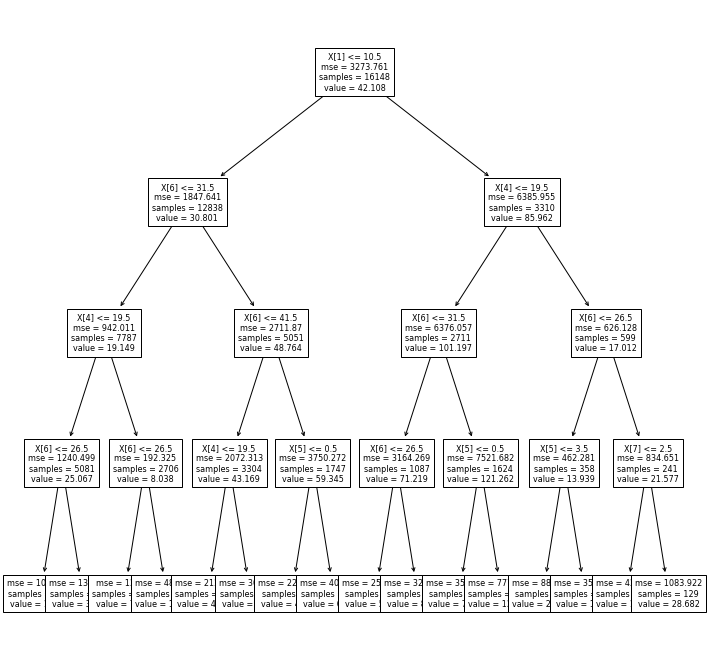

In [69]:
from sklearn import tree

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(regr_1, fontsize=8)
plt.show()

In [70]:
X

What is your gender? - Selected Choice  \
0                                           1   
1                                           0   
2                                           1   
3                                           1   
4                                           1   
...                                       ...   
20180                                       1   
20181                                       0   
20182                                       1   
20183                                       1   
20184                                       1   

       In which country do you currently reside?  \
0                                              8   
1                                             11   
2                                              5   
3                                              8   
4                                              8   
...                                          ...   
20180                                          4   
20181                                          5   
20182                                          8   
20183                                          3   
20184                                          8   

       What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                                      0                                                                 
1                                                      3                                                                 
2                                                      3                                                                 
3                                                      0                                                                 
4                                                      1                                                                 
...                                                  ...                                                                 
20180                                                  3                                                                 
20181                                                  3                                                                 
20182                                                  1                                                                 
20183                                                  1                                                                 
20184                                                  3                                                                 

       Which best describes your undergraduate major? - Selected Choice  \
0                                                      2                  
1                                                      1                  
2                                                      8                  
3                                                     11                  
4                                                      7                  
...                                                  ...                  
20180                                                  1                  
20181                                                  1                  
20182                                                  1                  
20183                                                  1                  
20184                                                  1                  

       Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                                     12                                                         
1                                                      7                                                         
2                                                      4                             

In [71]:
from matplotlib import pyplot


In [72]:
importance = regr_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.45205
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.23385
Feature: 5, Score: 0.03213
Feature: 6, Score: 0.28117
Feature: 7, Score: 0.00079


In [73]:
features_n = X.columns

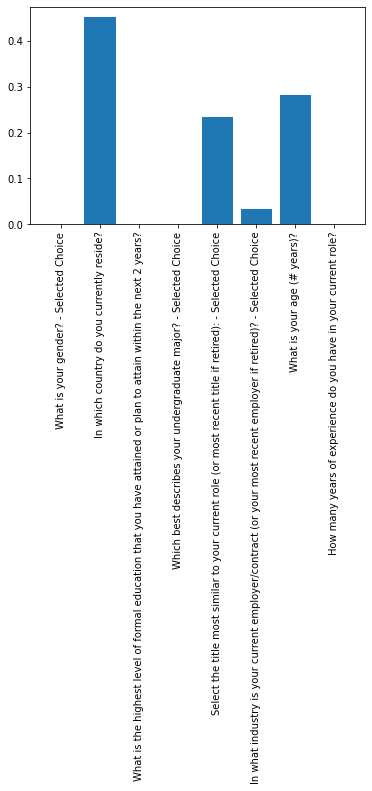

In [74]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()

In [75]:
df_modelo.iloc[:,1].value_counts() # vamos selecionar todos do pais 11 --> United States of America

8     6115
11    4151
5     3472
2     1349
7      871
9      743
0      654
4      643
10     616
1      529
3      524
6      518
Name: In which country do you currently reside?, dtype: int64

In [76]:
df_modelo.iloc[:,4].value_counts() # vamos pegar todos da profissao 7 - Data scientist

20    4350
7     3902
18    2936
4     1776
12    1254
16    1131
2      739
0      729
5      694
15     570
9      562
14     409
1      342
19     223
3      138
10     111
8      110
17      98
13      93
6       18
Name: Select the title most similar to your current role (or most recent title if retired): - Selected Choice, dtype: int64

In [78]:
df_modelo2 = df_modelo[(df_modelo.iloc[:,1] == 11) & (df_modelo.iloc[:,4] == 7) ]
# df_modelo2 = df_modelo[(df_modelo.iloc[:,4] == 14) ]

In [80]:
df_modelo2 = df_modelo2.drop(['In which country do you currently reside?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)
# df_modelo2 = df_modelo2.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)

KeyError: "['In which country do you currently reside?'\n 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'] not found in axis"

In [81]:
X = df_modelo2.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_modelo2['What is your current yearly compensation (approximate $USD)?']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [83]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [84]:

mean_absolute_error(y_test, y_pred)

52.11869185263258

In [87]:
features_n = X.columns

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04447
Feature: 2, Score: 0.14263
Feature: 3, Score: 0.40117
Feature: 4, Score: 0.14289
Feature: 5, Score: 0.26884


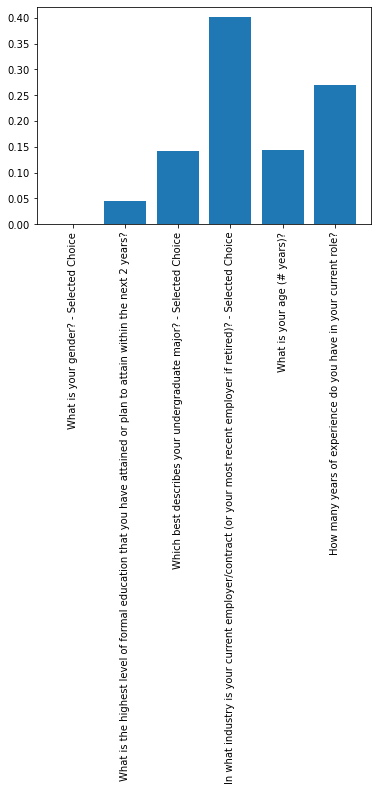

In [102]:
importance = regr_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()

In [89]:
df_modelo2.iloc[:,0].value_counts(normalize=True)

1    0.745011
0    0.231707
2    0.023282
Name: What is your gender? - Selected Choice, dtype: float64

In [90]:
df_modelo2.iloc[:,0].value_counts()

1    672
0    209
2     21
Name: What is your gender? - Selected Choice, dtype: int64

In [91]:
from sklearn.utils import resample

In [92]:

# Separate majority and minority classes
df_majority = df_modelo2[df_modelo2.iloc[:,0]==1]
df_minority = df_modelo2[df_modelo2.iloc[:,0]==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=209,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.iloc[:,0].value_counts()

1    209
0    209
Name: What is your gender? - Selected Choice, dtype: int64

In [93]:

df_majority_downsampled.head()

What is your gender? - Selected Choice  \
4217                                        1   
9250                                        1   
2579                                        1   
15649                                       1   
16156                                       1   

       What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
4217                                                   3                                                                 
9250                                                   3                                                                 
2579                                                   0                                                                 
15649                                                  3                                                                 
16156                                                  3                                                                 

       Which best describes your undergraduate major? - Selected Choice  \
4217                                                   8                  
9250                                                  12                  
2579                                                   3                  
15649                                                  2                  
16156                                                  8                  

       In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
4217                                                   3                                                                 
9250                                                  11                                                                 
2579                                                  16                                                                 
15649                                                 14                                                                 
16156                                                  3                                                                 

       What is your age (# years)?  \
4217                            34   
9250                            39   
2579                            24   
15649                           29   
16156                           29   

       How many years of experience do you have in your current role?  \
4217                                                   3                
9250                                                  15                
2579                                                   1                
15649                                                  4                
16156                                                  2                

       What is your current yearly compensation (approximate $USD)?  
4217                                                 125             
9250                                                 100             
2579                                                 100             
15649                                                200             
16156                                                250

In [94]:
X = df_majority_downsampled.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_majority_downsampled['What is your current yearly compensation (approximate $USD)?']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [96]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [97]:
mean_absolute_error(y_test, y_pred)

75.80565093953217

In [98]:
features_n = X.columns

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04447
Feature: 2, Score: 0.14263
Feature: 3, Score: 0.40117
Feature: 4, Score: 0.14289
Feature: 5, Score: 0.26884


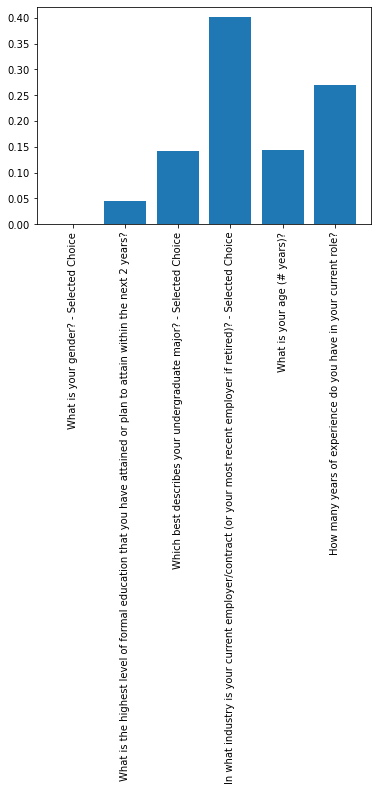

In [105]:
importance = regr_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()